In [1]:
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
from motors.simulation import Simulation
from motors.aesthetics import prepare_plot
from motors.aesthetics import paper_plot
from motors.plot import *

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)
prepare_plot()

# Pick an example angle

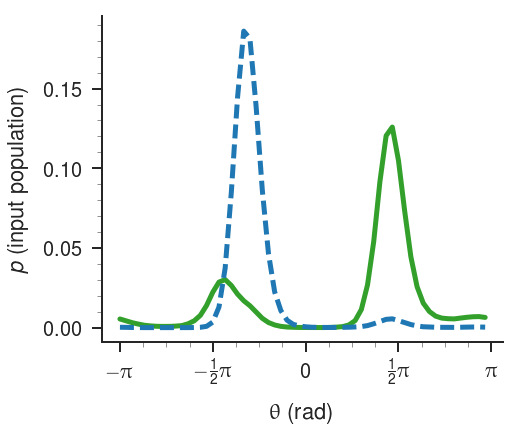

In [8]:
this = Simulation(data_source = 'adk_md_data')
this.name = 'chi2THR175'  # File name
this.cSubstrate = 10**-3  # Substrate concentration in [M]
this.simulate()
_ = plot_input(this)

# Symmetrize it by reversing and averaging with its image

In [9]:
data = this.unbound_population[1:]
reversed_data = data[::-1]
unbound_averaged = (data + reversed_data) / 2.

data = this.bound_population[1:]
reversed_data = data[::-1]
bound_averaged = (data + reversed_data) / 2.

In [10]:
this = Simulation(data_source='manual')
this.cSubstrate = 10**-3
this.unbound_population = unbound_averaged
this.bound_population = bound_averaged
this.C_intersurface = +1.00e+06
this.offset_factor = 5.7
this.catalytic_rate = +3.12e+02
this.simulate()

this.unbound_clr = cmap[3]
this.bound_clr = cmap[1]

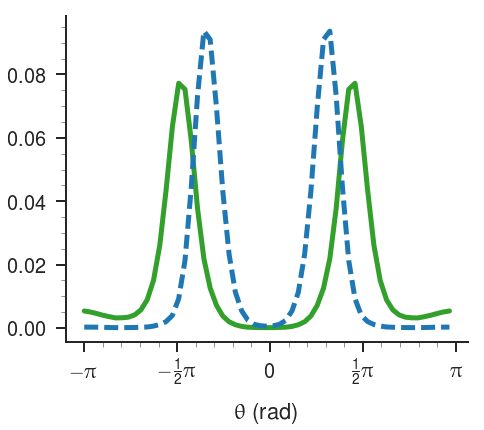

In [14]:
_ = plot_input(this)

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel(r'$\theta$ (rad)')
# panel_label('a', panel_xoffset=-0.23, panel_yoffset=1.0)

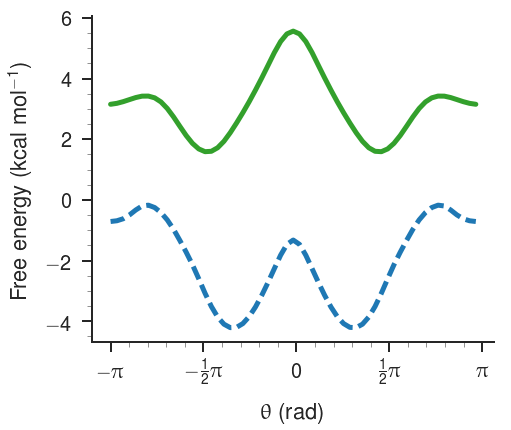

In [15]:
plot_energy(this)

ax = plt.gca()
ax.set_ylabel('Free energy (kcal mol$^{{-1}}$)')
# panel_label('b', panel_xoffset=-0.2, panel_yoffset=1.0)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         +1.29e-04  cycle second**-1
Peak                      +6.86e+01  cycle second**-1


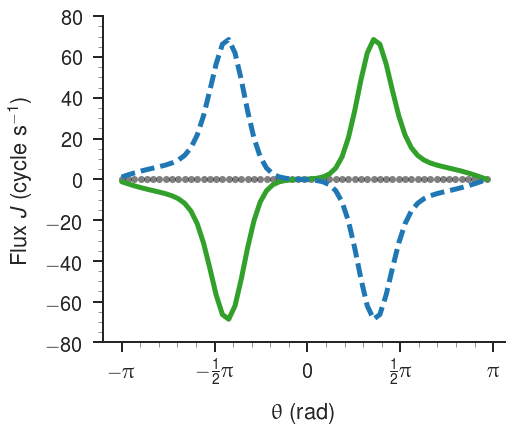

In [16]:
plot_flux(this)

ax = plt.gca()
ax.set_ylim([-80, 80])
# panel_label('c', panel_xoffset=-0.23, panel_yoffset=1.0)
ax.legend_.remove()